<a href="https://colab.research.google.com/github/gvsmaneesha/datascience/blob/master/ApacheLog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import os
import numpy as np
import re
import matplotlib.pyplot as plt
from datetime import datetime as dt
import plotly.express as px

https://github.com/logpai/loghub

In [ ]:
def groupit(logs,interval):
    ##log distribution weekly based on LogType and week 
    print("Value count of Event:")
    apache_group_by_week = logs.groupby([interval,"LogType_group","EventType"]).count()
    apache_group_by_week_df = apache_group_by_week.stack().reset_index()
    apache_group_by_week_df = apache_group_by_week_df.drop(["level_3"],axis=1)
    apache_group_by_week_df.columns
    apache_group_by_week_df.columns = [interval, 'LogType_group', 'EventType', "Count"]
    return apache_group_by_week_df

In [ ]:
!tar -xf Apache.tar

In [ ]:
##upload the data 
with open("Apache.log","r") as f:
  labels = f.read()
logs = labels.split("\n")
apache_logs =pd.DataFrame(logs,columns=["raw"])

In [ ]:
##data preprocessing
apache_logs["DateTime"] = apache_logs["raw"].str.extract("^\[([a-z|A-Z|\s|:|\0-9]+)\]")
apache_logs["WeekDay"] = apache_logs["DateTime"].str.split(" ",expand=True)[0]
apache_logs["Month"] = apache_logs["DateTime"].str.split(" ",expand=True)[1]
apache_logs["Time"] = apache_logs["DateTime"].str.split(" ",expand=True)[3]
apache_logs["Year"] = apache_logs["DateTime"].str.split(" ",expand=True)[4]
apache_logs["LogType"] = apache_logs["raw"].str.extract("\[.*\].*\[(.*)\]")
apache_logs["EventType"] = apache_logs["raw"].str.extract("\[.+\]\s\[.+\]\s(.+)")
apache_logs["EventMessage"] = apache_logs["EventType"].str.split(" ",n=1,expand=True)[1]
#apache_logs["EventMessage"] = apache_logs["EventType"].copy()
apache_logs["EventType"] = apache_logs["EventType"].str.split(" ",n=1,expand=True)[0]

In [ ]:
apache_logs["raw"].str.replace("^....\s","")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


0        Jun 09 06:07:04 2005] [notice] LDAP: Built wit...
1        Jun 09 06:07:04 2005] [notice] LDAP: SSL suppo...
2        Jun 09 06:07:04 2005] [notice] suEXEC mechanis...
3        Jun 09 06:07:05 2005] [notice] Digest: generat...
4              Jun 09 06:07:05 2005] [notice] Digest: done
                               ...                        
56477    Feb 27 21:56:11 2006] [error] [client 220.225....
56478    Feb 28 00:45:58 2006] [error] [client 206.125....
56479    Feb 28 00:46:47 2006] [error] [client 203.186....
56480    Feb 28 03:04:53 2006] [error] [client 69.39.5....
56481    Feb 28 03:49:01 2006] [error] [client 218.22.1...
Name: raw, Length: 56482, dtype: object

In [ ]:
##drop na 
apache_logs = apache_logs.dropna()
apache_logs["DateTime_format"]=apache_logs["DateTime"].apply(lambda row: dt.strptime(row,"%a %b %d %H:%M:%S %Y"))

In [ ]:
apache_logs["DateTime"] = apache_logs["raw"].str.replace("\s..\s","")

In [ ]:
##drop missing data
print("No. of empty or missing information in data:")
apache_logs.isnull().sum()

No. of empty or missing information in data:


raw                0
DateTime           0
WeekDay            0
Month              0
Time               0
Year               0
LogType            0
EventType          0
EventMessage       0
DateTime_format    0
dtype: int64

In [ ]:
##categorizing log types 
apache_logs["LogType_group"] = apache_logs["LogType"].apply(lambda row: row  if row in ["error","notice"] else "General")
apache_logs["Target"] = apache_logs["LogType"].apply(lambda row: 1  if row in ["error"] else  0 )

Value count of logType:


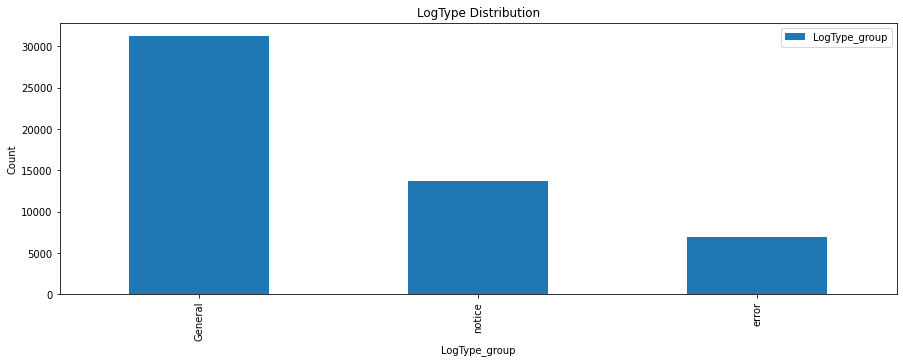

In [ ]:
##data distribution of anamoly 
print("Value count of logType:")
apache_logs['LogType_group'].value_counts().plot(kind='bar',title="LogType Distribution",figsize=(15,5),legend=True,xlabel="LogType_group",ylabel="Count")

Value count of Event:


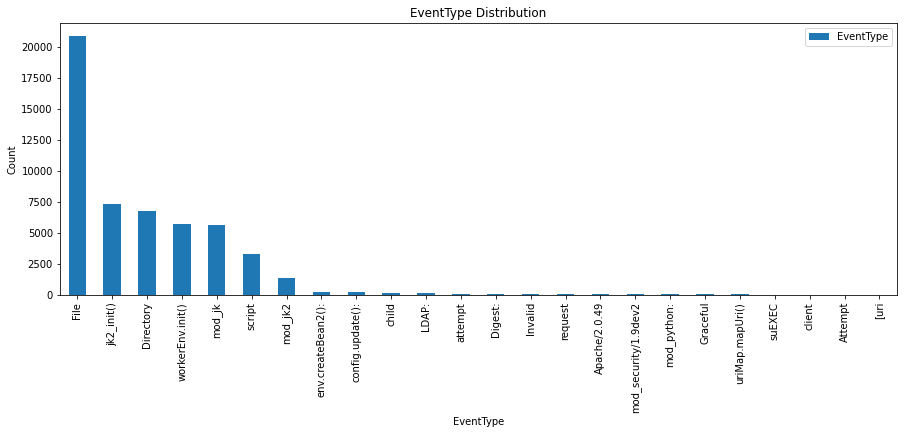

In [ ]:
##data distribution of anamoly 
print("Value count of Event:")
apache_logs['EventType'].value_counts().plot(kind='bar',title="EventType Distribution",figsize=(15,5),legend=True,xlabel="EventType",ylabel="Count")

In [ ]:
##Weekday Analysis
apache_group_by_Week = groupit(apache_logs,"WeekDay")

fig = px.bar(apache_group_by_Week, color="LogType_group", y="Count", x="WeekDay", barmode='group', hover_data=['EventType'])
fig.show()

Value count of Event:


In [ ]:
##Monthly Analysis
apache_group_by_Month = groupit(apache_logs,"Month")

fig = px.bar(apache_group_by_Month, color="LogType_group", y="Count", x="Month", barmode='group', hover_data=['EventType'])
fig.show()

Value count of Event:


In [ ]:
fig = px.scatter(apache_logs, x='DateTime_format', color="LogType_group",y="EventType")
fig.show()

In [ ]:
apache_logs_dt = apache_logs.groupby(["Time","LogType_group"]).count().stack().reset_index()

In [ ]:
apache_by_log = apache_logs.groupby(["LogType_group","EventType"]).count().stack().reset_index()[["EventType","LogType_group",0]]

In [ ]:
##Monthly Analysis
apache_group_by_Week = groupit(apache_logs,"WeekDay")

fig = px.scatter(apache_group_by_Week, color="LogType_group", y="Count", x="EventType", hover_data=['EventType'],facet_col="WeekDay",width=3000)
fig.show()

Value count of Event:


In [ ]:
apache_logs

,raw,DateTime,WeekDay,Month,Time,Year,LogType,EventType,EventMessage,DateTime_format,LogType_group,Target
0,[Thu Jun 09 06:07:04 2005] [notice] LDAP: Buil...,Thu Jun 09 06:07:04 2005,Thu,Jun,06:07:04,2005,notice,LDAP:,Built with OpenLDAP LDAP SDK,2005-06-09 06:07:04,notice,0
1,[Thu Jun 09 06:07:04 2005] [notice] LDAP: SSL ...,Thu Jun 09 06:07:04 2005,Thu,Jun,06:07:04,2005,notice,LDAP:,SSL support unavailable,2005-06-09 06:07:04,notice,0
2,[Thu Jun 09 06:07:04 2005] [notice] suEXEC mec...,Thu Jun 09 06:07:04 2005,Thu,Jun,06:07:04,2005,notice,suEXEC,mechanism enabled (wrapper: /usr/sbin/suexec),2005-06-09 06:07:04,notice,0
3,[Thu Jun 09 06:07:05 2005] [notice] Digest: ge...,Thu Jun 09 06:07:05 2005,Thu,Jun,06:07:05,2005,notice,Digest:,generating secret for digest authentication ...,2005-06-09 06:07:05,notice,0
4,[Thu Jun 09 06:07:05 2005] [notice] Digest: done,Thu Jun 09 06:07:05 2005,Thu,Jun,06:07:05,2005,notice,Digest:,done,2005-06-09 06:07:05,notice,0
...,...,...,...,...,...,...,...,...,...,...,...,...
56477,[Mon Feb 27 21:56:11 2006] [error] [client 220...,Mon Feb 27 21:56:11 2006,Mon,Feb,21:56:11,2006,client 220.225.166.39,Directory,index forbidden by rule: /var/www/html/,2006-02-27 21:56:11,General,0
56478,[Tue Feb 28 00:45:58 2006] [error] [client 206...,Tue Feb 28 00:45:58 2006,Tue,Feb,00:45:58,2006,client 206.125.60.10,Directory,index forbidden by rule: /var/www/html/,2006-02-28 00:45:58,General,0
56479,[Tue Feb 28 00:46:47 2006] [error] [client 203...,Tue Feb 28 00:46:47 2006,Tue,Feb,00:46:47,2006,client 203.186.238.253,Directory,index forbidden by rule: /var/www/html/,2006-02-28 00:46:47,General,0
56480,[Tue Feb 28 03:04:53 2006] [error] [client 69....,Tue Feb 28 03:04:53 2006,Tue,Feb,03:04:53,2006,client 69.39.5.163,Directory,index forbidden by rule: /var/www/html/,2006-02-28 03:04:53,General,0


# Logistic regression


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
examplevectorizer = CountVectorizer()
logtext = apache_logs.loc[:,"LogType_group"]
examplevectorizer.fit(logtext)
examplevectorizer.vocabulary_ 

{'error': 0, 'general': 1, 'notice': 2}

In [ ]:
examplevectorizer.transform(logtext).toarray()

array([[0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       ...,
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0]])

In [ ]:
##EDA
log_id_map = dict()
for i, event_id in enumerate(apache_logs['LogType_group'].unique(), 1):
                log_id_map[event_id] = i           
apache_logs['labels'] = apache_logs['LogType_group'].apply(lambda e: log_id_map[e] if log_id_map.get(e) else -1)

In [ ]:
### train - test data split 
from sklearn.model_selection import train_test_split
review = apache_logs['EventMessage'].values
label = apache_logs['Target'].values
X_Train, X_Test, Y_Train, Y_Test = train_test_split(review, label, test_size=0.40, random_state=1000) 

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
review_vectorizer = CountVectorizer()
review_vectorizer.fit(X_Train)
Xlr_train = review_vectorizer.transform(X_Train)
Xlr_test  = review_vectorizer.transform(X_Test)
Xlr_train 

<31202x4468 sparse matrix of type '<class 'numpy.int64'>'
	with 207940 stored elements in Compressed Sparse Row format>

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
LRmodel = LogisticRegression()
LRmodel.fit(Xlr_train, Y_Train)
score = LRmodel.score(Xlr_test, Y_Test)
print("Accuracy:", score) 
classification_report

Accuracy: 1.0


<function sklearn.metrics._classification.classification_report>

In [ ]:
apache_logs[apache_logs["Target"]==1].head()

,raw,DateTime,WeekDay,Month,Time,Year,LogType,EventType,EventMessage,DateTime_format,LogType_group,Target,labels
7,[Thu Jun 09 06:07:05 2005] [error] env.createB...,Thu Jun 09 06:07:05 2005,Thu,Jun,06:07:05,2005,error,env.createBean2():,Factory error creating channel.jni:jni ( chann...,2005-06-09 06:07:05,error,1,2
8,[Thu Jun 09 06:07:05 2005] [error] config.upda...,Thu Jun 09 06:07:05 2005,Thu,Jun,06:07:05,2005,error,config.update():,Can't create channel.jni:jni,2005-06-09 06:07:05,error,1,2
9,[Thu Jun 09 06:07:05 2005] [error] env.createB...,Thu Jun 09 06:07:05 2005,Thu,Jun,06:07:05,2005,error,env.createBean2():,"Factory error creating vm: ( vm, )",2005-06-09 06:07:05,error,1,2
10,[Thu Jun 09 06:07:05 2005] [error] config.upda...,Thu Jun 09 06:07:05 2005,Thu,Jun,06:07:05,2005,error,config.update():,Can't create vm:,2005-06-09 06:07:05,error,1,2
11,[Thu Jun 09 06:07:05 2005] [error] env.createB...,Thu Jun 09 06:07:05 2005,Thu,Jun,06:07:05,2005,error,env.createBean2():,Factory error creating worker.jni:onStartup ( ...,2005-06-09 06:07:05,error,1,2


#Random forest


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
clf = RandomForestClassifier()
clf.fit(Xlr_train, Y_Train)
#clf.predict(vectorizer.transform([‘apple is present’]).toarray())
score = clf.score(Xlr_test, Y_Test)
print("Accuracy:", score) 

Accuracy: 1.0


In [ ]:
result = clf.predict(review_vectorizer.transform(["Can't create channel"]).toarray())
print("Can't create channel",result[0])
result = clf.predict(review_vectorizer.transform(["Can't create VM"]).toarray())
print("CAn't create Vm",result[0])
result = clf.predict(review_vectorizer.transform(["Can't create server"]).toarray())
print("CAn't create server",result[0])
result = clf.predict(review_vectorizer.transform(["Can't create file"]).toarray())
print("can't create file",result[0])
result = clf.predict(review_vectorizer.transform(["directory create server"]).toarray())
print("directory found",result[0])

Can't create channel 1
CAn't create Vm 1
CAn't create server 1
can't create file 1
directory found 0


# CNN relu activation function

*   List item
*   List item




In [ ]:
### Vectorization to text data
from keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(num_words=500)
tokenizer.fit_on_texts(X_Train)
Xcnn_train = tokenizer.texts_to_sequences(X_Train)
Xcnn_test = tokenizer.texts_to_sequences(X_Test)
vocab_size = len(tokenizer.word_index) + 1  
print(X_Train[1:10])
print(Xcnn_train[1:10]) 

['child workerEnv in error state 5' 'child init 1 -2'
 'does not exist: /var/www/html/sumthin'
 'ok /etc/httpd/conf/workers2.properties'
 'Found child 6071 in scoreboard slot 8'
 'does not exist: /var/www/html/awstats/awstats.pl'
 'does not exist: /var/www/html/blog' 'does not exist: /var/www/html/blog'
 'does not exist: /var/www/html/drupal']
[[7, 24, 8, 23, 25, 43], [7, 47, 37, 44], [5, 4, 6, 1, 2, 3, 52], [17, 18, 19, 20, 21, 22], [9, 7, 8, 10, 15, 50], [5, 4, 6, 1, 2, 3, 16, 16, 33], [5, 4, 6, 1, 2, 3, 32], [5, 4, 6, 1, 2, 3, 32], [5, 4, 6, 1, 2, 3, 40]]


In [ ]:
from keras.preprocessing.sequence import pad_sequences
maxlen = 50
Xcnn_train = pad_sequences(Xcnn_train, padding='post', maxlen=maxlen)
Xcnn_test = pad_sequences(Xcnn_test, padding='post', maxlen=maxlen)
print(Xcnn_train[0, :]) 

[ 5  4  6  1  2  3 34  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0]


In [ ]:

from keras.models import Sequential
from keras import layers

In [ ]:
embedding_dim = 3
textcnnmodel = Sequential()
textcnnmodel.add(layers.Embedding(vocab_size, embedding_dim, input_length=maxlen))
textcnnmodel.add(layers.Conv1D(128, 5, activation='relu'))
textcnnmodel.add(layers.GlobalMaxPooling1D())
textcnnmodel.add(layers.Dense(10, activation='relu'))
textcnnmodel.add(layers.Dense(1, activation='sigmoid'))
textcnnmodel.compile(optimizer='adam',
               loss='binary_crossentropy',
               metrics=['accuracy'])
textcnnmodel.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 50, 3)             13449     
                                                                 
 conv1d (Conv1D)             (None, 46, 128)           2048      
                                                                 
 global_max_pooling1d (Globa  (None, 128)              0         
 lMaxPooling1D)                                                  
                                                                 
 dense (Dense)               (None, 10)                1290      
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                                 
Total params: 16,798
Trainable params: 16,798
Non-trainable params: 0
____________________________________________________

In [ ]:
textcnnmodel.fit(Xcnn_train, Y_Train,
                     epochs=5,
                     verbose=True,
                     validation_data=(Xcnn_test,Y_Test),
                     batch_size=2000)


Epoch 1/5
16/16 [==============================] - 12s 51ms/step - loss: 0.6418 - accuracy: 0.8611 - val_loss: 0.5835 - val_accuracy: 0.8644
Epoch 2/5
16/16 [==============================] - 0s 16ms/step - loss: 0.5254 - accuracy: 0.8672 - val_loss: 0.4563 - val_accuracy: 0.8644
Epoch 3/5
16/16 [==============================] - 0s 15ms/step - loss: 0.3991 - accuracy: 0.8672 - val_loss: 0.3473 - val_accuracy: 0.8644
Epoch 4/5
16/16 [==============================] - 0s 15ms/step - loss: 0.3161 - accuracy: 0.8672 - val_loss: 0.2922 - val_accuracy: 0.8644
Epoch 5/5
16/16 [==============================] - 0s 14ms/step - loss: 0.2637 - accuracy: 0.8672 - val_loss: 0.2351 - val_accuracy: 0.8644


In [ ]:
loss, accuracy = textcnnmodel.evaluate(Xcnn_train, Y_Train, verbose=True)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = textcnnmodel.evaluate(Xcnn_test, Y_Test, verbose=True)
print("Testing Accuracy:  {:.4f}".format(accuracy)) 

976/976 [==============================] - 3s 3ms/step - loss: 0.2319 - accuracy: 0.8672
Training Accuracy: 0.8672
651/651 [==============================] - 2s 3ms/step - loss: 0.2351 - accuracy: 0.8644
Testing Accuracy:  0.8644


#SGD

In [ ]:
from sklearn.linear_model import SGDClassifier

clf = SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42, max_iter=2, tol=None)
clf.fit(Xlr_train, Y_Train)

SGDClassifier(alpha=0.001, max_iter=2, random_state=42, tol=None)

In [ ]:
y_pred = clf.predict(Xlr_test)
print('accuracy %s' % accuracy_score(y_pred, Y_Test))
#print(classification_report(Y_Test, y_pred))

accuracy 1.0


In [ ]:
apache_logs.columns

Index(['raw', 'DateTime', 'WeekDay', 'Month', 'Time', 'Year', 'LogType',
       'EventType', 'EventMessage', 'DateTime_format', 'LogType_group',
       'Target', 'labels'],
      dtype='object')

LSTM using Deep Learning

In [ ]:
args = {"epochs":10 ,"learning_rate" :0.01 ,"hidden_dim": 128 ,"lstm_layers": 2 ,"batch_size": 64}

In [ ]:
class parameters:
    def __init__(self):
      self.epochs=10
      self.learning_rate=0.01
      self.hidden_dim = 128
      self.lstm_layers = 2
      self.batch_size = 64
      self.max_len = 10
      self.max_words = 100
      self.test_size = 0.5

In [ ]:
import numpy as np
import pandas as pd
from keras.preprocessing import sequence
from keras.preprocessing.text import Tokenizer
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
import torch.nn.functional as F

class Preprocessing:
	
	def __init__(self, args):
		self.max_len = args.max_len
		self.max_words = args.max_words
		self.test_size = args.test_size
		
	def load_data(self):
		df = apache_logs.loc[:,["EventMessage","Target"]].copy()	
		X = df['EventMessage'].values
		Y = df['Target'].values
		self.x_train, self.x_test, self.y_train, self.y_test = train_test_split(X, Y, test_size=self.test_size)
		
	def prepare_tokens(self):
		self.tokens = Tokenizer(num_words=self.max_words)
		self.tokens.fit_on_texts(self.x_train)

	def sequence_to_token(self, x):
		sequences = self.tokens.texts_to_sequences(x)
		return sequence.pad_sequences(sequences, maxlen=self.max_len)

In [ ]:
class TextClassifier(nn.ModuleList):
	def __init__(self, args):
		super(TextClassifier, self).__init__()
		
		self.batch_size = args.batch_size
		self.hidden_dim = args.hidden_dim
		self.LSTM_layers = args.lstm_layers
		self.input_size = args.max_words # embedding dimention
		
		self.dropout = nn.Dropout(0.5)
		self.embedding = nn.Embedding(self.input_size, self.hidden_dim, padding_idx=0)
		self.lstm = nn.LSTM(input_size=self.hidden_dim, hidden_size=self.hidden_dim, num_layers=self.LSTM_layers, batch_first=True)
		self.fc1 = nn.Linear(in_features=self.hidden_dim, out_features=257)
		self.fc2 = nn.Linear(257, 1)
		
	def forward(self, x):
	
		h = torch.zeros((self.LSTM_layers, x.size(0), self.hidden_dim))
		c = torch.zeros((self.LSTM_layers, x.size(0), self.hidden_dim))
		
		torch.nn.init.xavier_normal_(h)
		torch.nn.init.xavier_normal_(c)

		out = self.embedding(x)
		out, (hidden, cell) = self.lstm(out, (h,c))
		out = self.dropout(out)
		out = torch.relu_(self.fc1(out[:,-1,:]))
		out = self.dropout(out)
		out = torch.sigmoid(self.fc2(out))

		return out

In [ ]:
import numpy as np

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score


from torch.utils.data import Dataset
from torch.utils.data import DataLoader


class DatasetMaper(Dataset):
	'''
	Handles batches of dataset
	'''
	def __init__(self, x, y):
		self.x = x
		self.y = y
		
	def __len__(self):
		return len(self.x)
		
	def __getitem__(self, idx):
		return self.x[idx], self.y[idx]
		

class Execute:
	'''
	Class for execution. Initializes the preprocessing as well as the 
	Tweet Classifier model
	'''

	def __init__(self, args):
		self.__init_data__(args)
		
		self.args = args
		self.batch_size = args.batch_size
		
		self.model = TextClassifier(args)
		
	def __init_data__(self, args):
		'''
		Initialize preprocessing from raw dataset to dataset split into training and testing
		Training and test datasets are index strings that refer to tokens
		'''
		self.preprocessing = Preprocessing(args)
		self.preprocessing.load_data()
		self.preprocessing.prepare_tokens()

		raw_x_train = self.preprocessing.x_train
		raw_x_test = self.preprocessing.x_test
		
		self.y_train = self.preprocessing.y_train
		self.y_test = self.preprocessing.y_test

		self.x_train = self.preprocessing.sequence_to_token(raw_x_train)
		self.x_test = self.preprocessing.sequence_to_token(raw_x_test)
		
	def train(self):
		
		training_set = DatasetMaper(self.x_train, self.y_train)
		test_set = DatasetMaper(self.x_test, self.y_test)
		
		self.loader_training = DataLoader(training_set, batch_size=self.batch_size)
		self.loader_test = DataLoader(test_set)
		
		optimizer = optim.RMSprop(self.model.parameters(), lr=args.learning_rate)
		for epoch in range(args.epochs):
			
			predictions = []
			
			self.model.train()
			
			for x_batch, y_batch in self.loader_training:
				
				x = x_batch.type(torch.LongTensor)
				y = y_batch.type(torch.FloatTensor)
				
				y_pred = self.model(x)
				
				loss = F.binary_cross_entropy(y_pred.squeeze(), y)
				
				optimizer.zero_grad()
				
				loss.backward()
				
				optimizer.step()
				
				predictions += list(y_pred.squeeze().detach().numpy())
			
			test_predictions = self.evaluation()
			
			train_accuary = self.calculate_accuracy(self.y_train, predictions)
			test_accuracy = self.calculate_accuracy(self.y_test, test_predictions)
			
			print("Epoch: %d, loss: %.5f, Train accuracy: %.5f, Test accuracy: %.5f" % (epoch+1, loss.item(), train_accuary, test_accuracy))
			
	def evaluation(self):

		predictions = []
		self.model.eval()
		with torch.no_grad():
			for x_batch, y_batch in self.loader_test:
				x = x_batch.type(torch.LongTensor)
				y = y_batch.type(torch.FloatTensor)
				
				y_pred = self.model(x)
				predictions += list(y_pred.detach().numpy())
				
		return predictions
			
	@staticmethod
	def calculate_accuracy(grand_truth, predictions):
		true_positives = 0
		true_negatives = 0
		
		for true, pred in zip(grand_truth, predictions):
			if (pred > 0.5) and (true == 1):
				true_positives += 1
			elif (pred < 0.5) and (true == 0):
				true_negatives += 1
			else:
				pass
				
		return (true_positives+true_negatives) / len(grand_truth)
	

In [ ]:
args = parameters()
execute = Execute(args)
execute.train()

Epoch: 1, loss: 0.00000, Train accuracy: 0.99181, Test accuracy: 0.99938
Epoch: 2, loss: 0.00000, Train accuracy: 0.99950, Test accuracy: 0.99938
Epoch: 3, loss: 0.00000, Train accuracy: 0.99950, Test accuracy: 0.99938
Epoch: 4, loss: 0.00000, Train accuracy: 0.99631, Test accuracy: 0.99938
Epoch: 5, loss: 0.00000, Train accuracy: 0.99950, Test accuracy: 0.99938
Epoch: 6, loss: 0.00000, Train accuracy: 0.99938, Test accuracy: 0.99938
Epoch: 7, loss: 0.00000, Train accuracy: 0.99942, Test accuracy: 0.99938
Epoch: 8, loss: 0.00000, Train accuracy: 0.99938, Test accuracy: 0.99935
Epoch: 9, loss: 0.00000, Train accuracy: 0.99962, Test accuracy: 0.99938
Epoch: 10, loss: 0.00000, Train accuracy: 0.99931, Test accuracy: 0.99938
